In [2]:
import os
#import requests
from zipfile import ZipFile
from urllib.request import urlopen
import pandas as pd
import timeit 
import matplotlib.pyplot as plt

In [3]:
def download_data():
    if not os.path.exists("data1"):
        os.makedirs("data1")    

    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip"
    """
    hpc = requests.get(url)
    with open("data1/household_power_consumption.zip", 'wb') as file:
        file.write(hpc.content)
    """
    hpc = urlopen(url)
 
    with open("data1/household_power_consumption.zip", 'wb') as file:
        for line in hpc:
             file.write(line)

    with ZipFile("data1/household_power_consumption.zip") as zipFile:
        zipFile.extractall("data1")

In [4]:
download_data()

# Используя датафрейм

In [5]:
def read_to_frame():
    #file_name = os.path.join('data1', "*.txt")
    #print (file_name)
    df = pd.read_csv("data1/household_power_consumption.txt", sep=";", index_col=False, header=0) 
    return df

In [6]:
%%time
df = read_to_frame()
df

C:\Users\Acer\Anaconda3\envs\myenv\lib\site-packages\IPython\core\magic.py:187: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


Wall time: 4.56 s


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0,240.43,4,0,0,0.0
2075255,26/11/2010,20:59:00,0.944,0,240,4,0,0,0.0
2075256,26/11/2010,21:00:00,0.938,0,239.82,3.8,0,0,0.0
2075257,26/11/2010,21:01:00,0.934,0,239.7,3.8,0,0,0.0


In [7]:
def clear_data(df):
    cols = ['Active_P', 'Reactive_P', 'Voltage', 'Intensity', 'Sub_m_1', 'Sub_m_2', 'Sub_m_3']
    df['DateTime'] = pd.to_datetime(df['Date']+df['Time'], format="%d/%m/%Y%H:%M:%S")
    df.drop(['Date', 'Time'], axis=1, inplace=True)
    df.set_index('DateTime', inplace=True)
    df.columns = cols
    for col in cols:
        df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df.dropna(axis=0, inplace=True)
    return df

In [8]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [9]:
%%time
clear_data(df)

Wall time: 16.3 s


,Active_P,Reactive_P,Voltage,Intensity,Sub_m_1,Sub_m_2,Sub_m_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [10]:
df.dtypes

Active_P      float64
Reactive_P    float64
Voltage       float64
Intensity     float64
Sub_m_1       float64
Sub_m_2       float64
Sub_m_3       float64
dtype: object

In [11]:
df.isnull().any()

Active_P      False
Reactive_P    False
Voltage       False
Intensity     False
Sub_m_1       False
Sub_m_2       False
Sub_m_3       False
dtype: bool

## Выбрать строки, где общая активная мощность > 5 кВт

In [12]:
def active_power(df, min_pow):
    return df[df.Active_P>min_pow]

In [13]:
for i in range(1, 7):
    i=10**i
    print(timeit.timeit('active_power(df[:i], 5)',number=10, globals = globals()))

0.021682099999992488
0.008576099999999087
0.014365900000001375
0.00894089999999892
0.031190800000004515
0.03266990000000192


## Выбрать строки, в которых вольтаж превышает 235 В

In [14]:
def voltage (df, min_v):
    return df[df.Voltage>min_v]

In [15]:
%%time
voltage (df, 235)

Wall time: 150 ms


,Active_P,Reactive_P,Voltage,Intensity,Sub_m_1,Sub_m_2,Sub_m_3
DateTime,,,,,,,
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


##  Выбрать все строки, в которых сила тока лежит в пределах 19-20А, для них определить те, в которых стиральная машина и холодильник потребляют больше, чем бойлер и кондиционер

сила тока - intensity

sub_m_1: посудомойка, микроволновка

sub_m_2: стиральная машина, холодильник, сушка (хз как правильно), свет

sub_m_3: бойлер, кондиционер

In [16]:
def intensity_and_sub_m (df, min_i, max_i):
    return df[(df.Intensity>=min_i)&(df.Intensity<=max_i)&(df.Sub_m_2>df.Sub_m_3)]

In [17]:
%%time
intensity_and_sub_m (df, 19, 20)

Wall time: 21.9 ms


,Active_P,Reactive_P,Voltage,Intensity,Sub_m_1,Sub_m_2,Sub_m_3
DateTime,,,,,,,
2006-12-16 18:09:00,4.464,0.136,234.66,19.0,0.0,37.0,16.0
2006-12-17 01:04:00,4.582,0.258,238.08,19.6,0.0,13.0,0.0
2006-12-17 01:08:00,4.618,0.104,239.61,19.6,0.0,27.0,0.0
2006-12-17 01:19:00,4.636,0.140,237.37,19.4,0.0,36.0,0.0
2006-12-17 01:20:00,4.634,0.152,237.17,19.4,0.0,35.0,0.0
...,...,...,...,...,...,...,...
2010-11-24 07:53:00,4.666,0.000,235.72,19.8,0.0,39.0,17.0
2010-11-24 07:54:00,4.694,0.000,236.78,19.8,0.0,39.0,18.0
2010-11-24 07:55:00,4.602,0.000,237.08,19.4,0.0,40.0,17.0


## Выбрать случайным образом 500000 строк (без повторов элементов выборки), для них вычислить средние величины всех 3х групп потребления электроэнегрии

In [18]:
num=500000
df_rand = df.sample(n=num)


In [19]:
def mean_rand(df_rand):
    mean1 = df_rand['Sub_m_1'].mean()
    mean2 = df_rand['Sub_m_2'].mean()
    mean3 = df_rand['Sub_m_3'].mean()
   # print(f"mean of S_m_1 = {mean1}")
    #print(f"mean of S_m_2 = {mean2}")
    #print(f"mean of S_m_3 = {mean3}")
    #df_rand['Mean'] = df_rand[['Sub_m_1','Sub_m_2', 'Sub_m_3']].mean(1)
    #df_rand.drop(['Sub_m_1', 'Sub_m_2', 'Sub_m_3'], axis=1, inplace=True)
    #return df_rand

In [20]:
%%timeit
mean_rand(df_rand)

16.4 ms ± 2.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Выбрать те строки, в которых домохозяйства после 18:00 потребляют больше 6 кВт в минуту в среднем. Среди выбранных строк определить те, в которых основное употребление электроенергии выпадает на стиралку (группа 2). Потом выбрать каждый третий результат из первой половины и каждый четвертый результат из второй половины


In [21]:
def time_and_active_p(df, min_h, min_p):
    df_t = df[(df.index.hour>=min_h)&(df.Active_P>min_p)]
    df_t = df_t[(df_t.Sub_m_1<df_t.Sub_m_2)&(df_t.Sub_m_3<df_t.Sub_m_2)]
    return df_t

In [22]:
%%time
df_t = time_and_active_p(df_rand, 18, 6)

Wall time: 68.8 ms


In [23]:
df_t

,Active_P,Reactive_P,Voltage,Intensity,Sub_m_1,Sub_m_2,Sub_m_3
DateTime,,,,,,,
2010-03-27 18:35:00,6.600,0.252,234.02,28.2,0.0,71.0,17.0
2007-01-20 19:34:00,8.306,0.146,228.59,36.2,0.0,34.0,16.0
2007-01-20 19:21:00,8.658,0.402,226.33,38.2,0.0,34.0,15.0
2009-01-02 18:35:00,7.186,0.110,234.72,30.8,29.0,36.0,17.0
2009-02-22 21:14:00,7.246,0.286,233.30,31.4,37.0,49.0,0.0
...,...,...,...,...,...,...,...
2007-04-02 22:01:00,6.014,0.000,232.69,25.8,1.0,36.0,17.0
2007-03-31 20:03:00,6.254,0.528,235.95,26.6,0.0,37.0,17.0
2007-10-13 20:15:00,6.212,0.108,232.83,26.6,0.0,35.0,17.0


In [24]:
def first_step_3(df):
    return df.iloc[:int(len(df)/2):3] 

def second_step_4(df):
    return df.iloc[int(len(df)/2)::4]

In [25]:
%%time
first_step_3(df_t)

Wall time: 0 ns


,Active_P,Reactive_P,Voltage,Intensity,Sub_m_1,Sub_m_2,Sub_m_3
DateTime,,,,,,,
2010-03-27 18:35:00,6.600,0.252,234.02,28.2,0.0,71.0,17.0
2009-01-02 18:35:00,7.186,0.110,234.72,30.8,29.0,36.0,17.0
2008-03-23 20:18:00,7.444,0.196,233.47,31.8,36.0,37.0,17.0
2010-03-07 18:16:00,7.140,0.248,233.37,30.8,0.0,58.0,1.0
2006-12-29 21:25:00,6.086,0.000,229.04,26.6,0.0,69.0,0.0
2008-11-04 20:53:00,6.426,0.244,233.21,28.0,0.0,60.0,17.0
2007-02-03 19:03:00,6.844,0.570,229.27,30.2,24.0,34.0,16.0
2007-12-08 20:29:00,6.158,0.344,234.28,26.2,0.0,35.0,17.0
2008-11-23 20:36:00,6.528,0.152,234.35,27.8,0.0,36.0,16.0


In [26]:
%%time
second_step_4(df_t)

Wall time: 2.99 ms


,Active_P,Reactive_P,Voltage,Intensity,Sub_m_1,Sub_m_2,Sub_m_3
DateTime,,,,,,,
2008-04-20 21:01:00,8.084,0.288,232.56,34.6,1.0,71.0,18.0
2008-11-23 18:06:00,7.514,0.344,229.27,32.8,0.0,34.0,16.0
2009-04-17 20:48:00,7.010,0.152,235.94,29.6,0.0,73.0,17.0
2006-12-28 21:18:00,7.864,0.126,232.46,34.2,36.0,56.0,16.0
2008-10-12 20:22:00,7.852,0.000,231.35,34.0,0.0,70.0,17.0
2007-02-15 19:37:00,6.906,0.608,233.80,29.6,0.0,37.0,17.0
2008-04-12 18:19:00,6.568,0.394,237.70,27.6,34.0,36.0,18.0
2007-04-01 18:51:00,6.036,0.246,232.53,25.8,0.0,72.0,17.0
2009-04-13 20:52:00,6.028,0.180,235.80,25.4,1.0,72.0,1.0


# Используя Numpy

In [27]:
import numpy as np

In [28]:
%%time
file_name = "data1/household_power_consumption.txt"
cols = ['Date', 'Time','Active_P','Reactive_P','Voltage','Intensity','S_m_1', 'S_m_2', 'S_m_3']
n_t = {
    'names':cols,
    'formats':['U10', 'U10', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8']
}

arr = np.genfromtxt(file_name, delimiter=';',  skip_header=1, dtype=n_t ,missing_values=['?'])

Wall time: 46.3 s


In [29]:
arr


array([('16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0., 1., 17.),
       ('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.),
       ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.),
       ...,
       ('26/11/2010', '21:00:00', 0.938, 0.   , 239.82,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:01:00', 0.934, 0.   , 239.7 ,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:02:00', 0.932, 0.   , 239.55,  3.8, 0., 0.,  0.)],
      dtype=[('Date', '<U10'), ('Time', '<U10'), ('Active_P', '<f8'), ('Reactive_P', '<f8'), ('Voltage', '<f8'), ('Intensity', '<f8'), ('S_m_1', '<f8'), ('S_m_2', '<f8'), ('S_m_3', '<f8')])

In [30]:
cols[2:9]

['Active_P', 'Reactive_P', 'Voltage', 'Intensity', 'S_m_1', 'S_m_2', 'S_m_3']

In [31]:
np.isnan(arr['Active_P'])

array([False, False, False, ..., False, False, False])

In [32]:
%%time
nan_mask = np.zeros((len(arr)), dtype=bool)
print(nan_mask)
for column in cols[2:8]:
    nan_mask = np.isnan(arr[column])
    arr =  arr[~nan_mask]
print(arr)
print(len(arr))

[False False False ... False False False]
[('16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0., 1., 17.)
 ('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.)
 ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.) ...
 ('26/11/2010', '21:00:00', 0.938, 0.   , 239.82,  3.8, 0., 0.,  0.)
 ('26/11/2010', '21:01:00', 0.934, 0.   , 239.7 ,  3.8, 0., 0.,  0.)
 ('26/11/2010', '21:02:00', 0.932, 0.   , 239.55,  3.8, 0., 0.,  0.)]
2049280
Wall time: 1.82 s


## Выбрать строки, где общая активная мощность > 5 кВт


In [33]:
def arr_pow(arr, n):
    return arr[arr['Active_P'] > n]


In [75]:
y1 = []
y2 = []
x = []
for i in range(0, 7):
    i=10**i
    x.append(i)
for i in x:    
    y1.append(timeit.timeit('arr_pow(arr[:i], 5)',number=10, globals = globals()))
    y2.append(timeit.timeit('active_power(df[:i], 5)',number=10, globals = globals()))



In [76]:
def make_plot( x_max, y_max):    
    plt.figure(figsize=(10,10))
    f1 = plt.semilogx(x, y1, label="task1")
    f2 = plt.semilogx(x, y2, label="task2")
    plt.legend(['numpy', 'pandas'])
    plt.xlabel("Количество элементов")
    plt.ylabel("Время")
    plt.axis([1, x_max, 0, y_max])

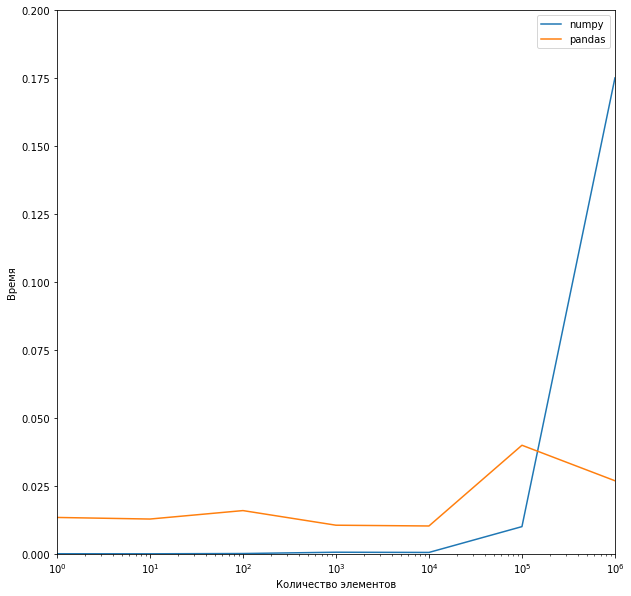

In [77]:
make_plot( 1000000, 0.2)

In [40]:
%%time
arr_pow(arr, 5)

Wall time: 19.9 ms


array([('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0.,  1., 16.),
       ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0.,  2., 17.),
       ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0.,  1., 17.),
       ...,
       ('24/11/2010', '07:50:00', 5.172, 0.05 , 235.18, 22. , 0., 38., 17.),
       ('24/11/2010', '07:51:00', 5.75 , 0.   , 234.4 , 24.6, 0., 39., 17.),
       ('25/11/2010', '07:21:00', 5.074, 0.24 , 238.55, 21.4, 1.,  2., 18.)],
      dtype=[('Date', '<U10'), ('Time', '<U10'), ('Active_P', '<f8'), ('Reactive_P', '<f8'), ('Voltage', '<f8'), ('Intensity', '<f8'), ('S_m_1', '<f8'), ('S_m_2', '<f8'), ('S_m_3', '<f8')])

## Выбрать строки, в которых вольтаж превышает 235 В

In [41]:
def arr_volt(arr, v):
    return arr[arr['Voltage'] > v]

In [42]:
%%time
arr_volt(arr, 235)

Wall time: 200 ms


array([('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0., 1., 17.),
       ('16/12/2006', '17:29:00', 3.52 , 0.522, 235.02, 15. , 0., 2., 17.),
       ('16/12/2006', '17:30:00', 3.702, 0.52 , 235.09, 15.8, 0., 1., 17.),
       ...,
       ('26/11/2010', '21:00:00', 0.938, 0.   , 239.82,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:01:00', 0.934, 0.   , 239.7 ,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:02:00', 0.932, 0.   , 239.55,  3.8, 0., 0.,  0.)],
      dtype=[('Date', '<U10'), ('Time', '<U10'), ('Active_P', '<f8'), ('Reactive_P', '<f8'), ('Voltage', '<f8'), ('Intensity', '<f8'), ('S_m_1', '<f8'), ('S_m_2', '<f8'), ('S_m_3', '<f8')])

In [80]:
y1 = []
y2 = []
for i in x:
    y1.append(timeit.timeit('arr_volt(arr[:i], 235)',number=10, globals = globals()))
    y2.append(timeit.timeit('voltage(df[:i], 235)',number=10, globals = globals()))


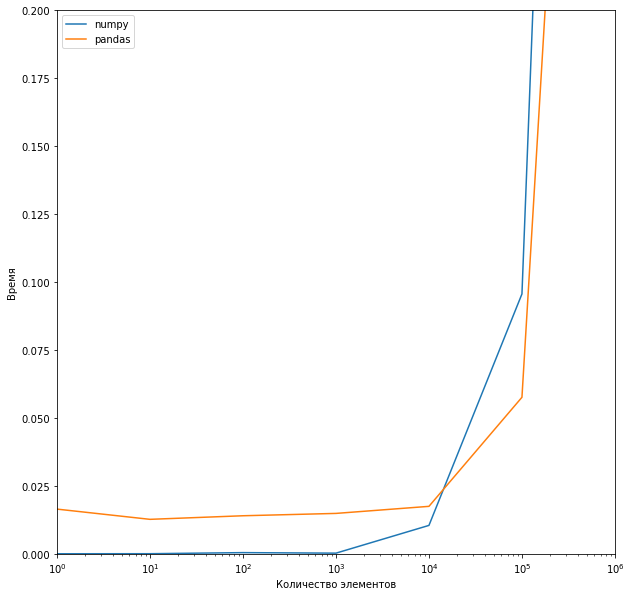

In [81]:
make_plot(1000000, 0.2)

##  Выбрать все строки, в которых сила тока лежит в пределах 19-20А, для них определить те, в которых стиральная машина и холодильник потребляют больше, чем бойлер и кондиционер

In [45]:
def arr_intensity(arr, min_i, max_i):
    res = arr[(arr['Intensity'] > min_i) & (arr['Intensity']<max_i)&(arr['S_m_2']>arr['S_m_3'])]
    return res

In [82]:
y1 = []
y2 = []
for i in x:
    y1.append(timeit.timeit('arr_intensity(arr[:i], 19, 20)',number=10, globals = globals()))
    y2.append(timeit.timeit('intensity_and_sub_m(df[:i], 19, 20)',number=10, globals = globals()))


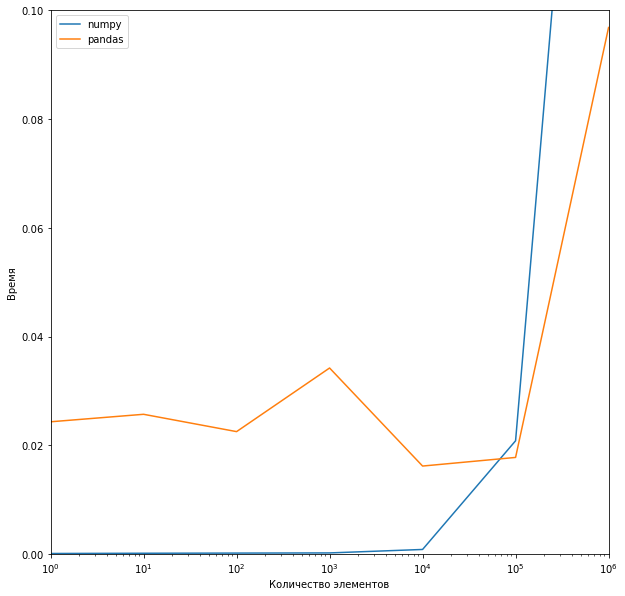

In [83]:
make_plot(1000000, 0.1)

In [50]:
%%time
arr_intensity(arr, 19, 20)

Wall time: 61.8 ms


array([('17/12/2006', '01:04:00', 4.582, 0.258, 238.08, 19.6, 0., 13.,  0.),
       ('17/12/2006', '01:08:00', 4.618, 0.104, 239.61, 19.6, 0., 27.,  0.),
       ('17/12/2006', '01:19:00', 4.636, 0.14 , 237.37, 19.4, 0., 36.,  0.),
       ...,
       ('24/11/2010', '07:54:00', 4.694, 0.   , 236.78, 19.8, 0., 39., 18.),
       ('24/11/2010', '07:55:00', 4.602, 0.   , 237.08, 19.4, 0., 40., 17.),
       ('24/11/2010', '07:57:00', 4.626, 0.   , 236.78, 19.4, 0., 39., 17.)],
      dtype=[('Date', '<U10'), ('Time', '<U10'), ('Active_P', '<f8'), ('Reactive_P', '<f8'), ('Voltage', '<f8'), ('Intensity', '<f8'), ('S_m_1', '<f8'), ('S_m_2', '<f8'), ('S_m_3', '<f8')])

## Выбрать случайным образом 500000 строк (без повторов элементов выборки), для них вычислить средние величины всех 3х групп потребления электроэнегрии

In [51]:
def rand_arr():
    return arr[np.random.choice(np.arange(0,len(arr)), 500000, replace=False)]


In [52]:
%%time
rand_arr = rand_arr()

Wall time: 456 ms


In [53]:
len(np.unique(rand_arr))

500000

In [54]:
def mean_arr(arr):
    mean_1 = np.mean(rand_arr['S_m_1'])
    mean_2 = np.mean(rand_arr['S_m_2'])
    mean_3 = np.mean(rand_arr['S_m_3'])
    #print(f"mean of S_m_1 = {mean_1}")
    #print(f"mean of S_m_2 = {mean_2}")
    #print(f"mean of S_m_3 = {mean_3}")

In [84]:
y1 = []
y2 = []
for i in x:
    y1.append(timeit.timeit('mean_arr(rand_arr[:i])',number=10, globals = globals()))
    y2.append(timeit.timeit('mean_rand(df_rand[:i])',number=10, globals = globals()))


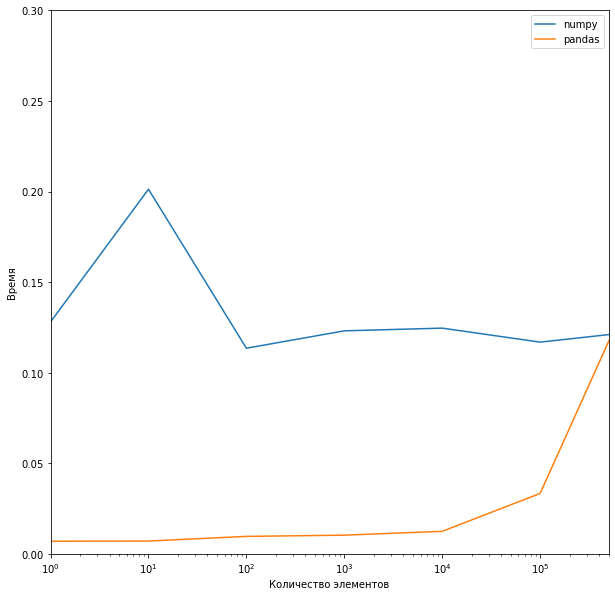

In [85]:
make_plot(500000, 0.3)

In [58]:
%%time
mean_arr(arr)

Wall time: 13 ms


## Выбрать те строки, в которых домохозяйства после 18:00 потребляют больше 6 кВт в минуту в среднем. Среди выбранных строк определить те, в которых основное употребление электроенергии выпадает на стиралку (группа 2). Потом выбрать каждый третий результат из первой половины и каждый четвертый результат из второй половины

In [59]:
%%time
def time_and_active_arr(arr, min_t, min_p):
    condition = np.logical_and.reduce([ arr['Time'] >=f"{min_t}:00:00",arr['Active_P']>min_p, 
                                   arr['S_m_2'] > arr["S_m_3"], arr["S_m_1"]<arr["S_m_2"] ])
    return arr[condition]

Wall time: 0 ns


In [60]:
time_and_active_arr(arr, 18, 6)


array([('16/12/2006', '18:05:00', 6.052, 0.192, 232.93, 26.2,  0., 37., 17.),
       ('16/12/2006', '18:06:00', 6.752, 0.186, 232.12, 29. ,  0., 36., 17.),
       ('16/12/2006', '18:07:00', 6.474, 0.144, 231.85, 27.8,  0., 37., 16.),
       ...,
       ('20/11/2010', '18:46:00', 6.438, 0.308, 229.26, 28.4, 13., 39., 16.),
       ('20/11/2010', '18:49:00', 6.21 , 0.174, 228.82, 27.4, 21., 34., 17.),
       ('20/11/2010', '18:52:00', 6.364, 0.126, 229.38, 28.2, 17., 34., 16.)],
      dtype=[('Date', '<U10'), ('Time', '<U10'), ('Active_P', '<f8'), ('Reactive_P', '<f8'), ('Voltage', '<f8'), ('Intensity', '<f8'), ('S_m_1', '<f8'), ('S_m_2', '<f8'), ('S_m_3', '<f8')])

In [86]:
y1 = []
y2 = []
for i in x:
    y1.append(timeit.timeit('time_and_active_arr(rand_arr[:i], 18, 6)',number=10, globals = globals()))
    y2.append(timeit.timeit('time_and_active_p(df_rand[:i], 18, 6)',number=10, globals = globals()))

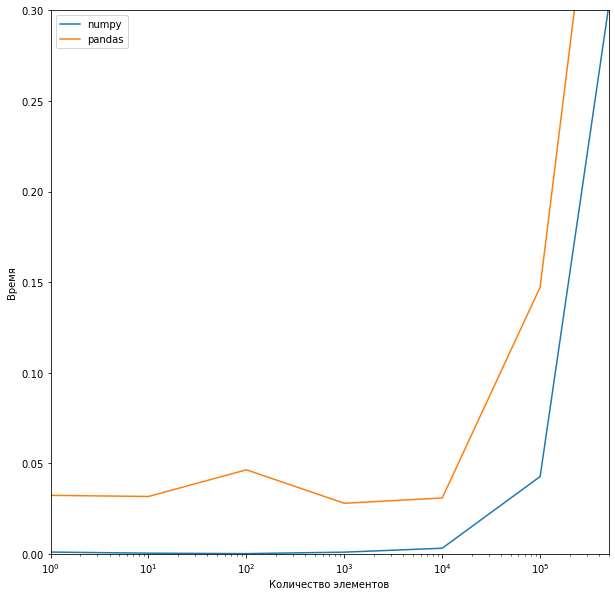

In [87]:
make_plot(500000, 0.3)

In [63]:
df_t = time_and_active_p(df_rand, 18, 6)
arr_t = time_and_active_arr(rand_arr, 18, 6)

In [64]:
def first_arr_step3(arr):
    middle = int(len(arr)/2)
    return arr[0:middle:3]

In [90]:
y1 = []
y2 = []
for i in x:
    y1.append(timeit.timeit('first_arr_step3(arr_t[:i])',number=10, globals = globals()))
    y2.append(timeit.timeit('first_step_3(df_t[:i])',number=10, globals = globals()))

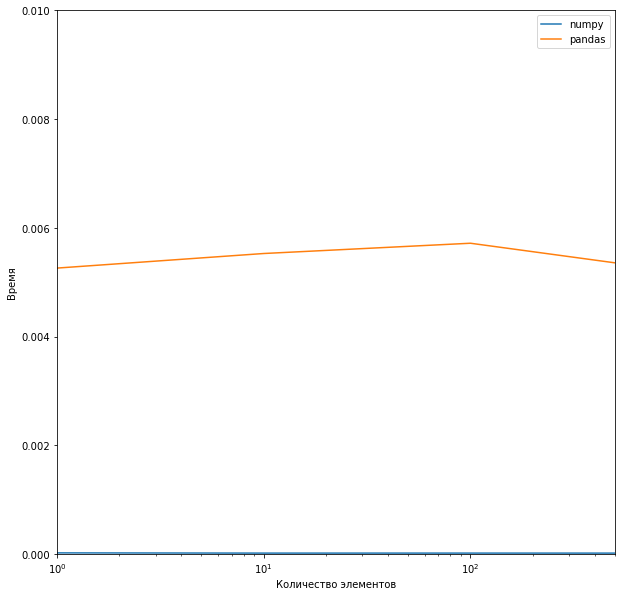

In [91]:
make_plot(500, 0.01)

In [69]:
%%time
first_arr_step3(arr_t)

Wall time: 0 ns


array([('23/2/2009', '22:02:00', 7.694, 0.116, 232.67, 33.2,  1., 64., 18.),
       ('14/12/2009', '18:42:00', 6.008, 0.442, 238.3 , 25.4,  0., 38., 18.),
       ('15/1/2010', '20:47:00', 6.378, 0.36 , 238.9 , 27. ,  9., 37., 18.),
       ('30/11/2008', '20:16:00', 8.444, 0.058, 232.87, 36.4,  5., 72., 17.),
       ('20/11/2010', '18:39:00', 6.362, 0.372, 229.83, 28. , 16., 35., 16.),
       ('28/12/2006', '21:16:00', 8.046, 0.114, 231.77, 35. , 36., 52., 16.),
       ('13/10/2007', '19:57:00', 6.188, 0.334, 231.54, 26.8,  0., 34., 17.),
       ('23/11/2008', '18:03:00', 7.106, 0.364, 230.52, 31. ,  0., 26., 17.),
       ('9/12/2008', '18:07:00', 7.136, 0.   , 234.43, 30.4,  0., 37.,  0.),
       ('17/3/2009', '20:27:00', 7.546, 0.126, 237.74, 31.8,  0., 65., 17.),
       ('4/11/2008', '20:48:00', 7.816, 0.274, 231.91, 33.6,  0., 72., 17.),
       ('12/8/2007', '23:22:00', 6.122, 0.242, 228.44, 27.6, 25., 26., 16.),
       ('8/6/2008', '21:46:00', 6.962, 0.132, 234.92, 29.6,  0., 72., 

In [70]:
%%time
def second_arr_step4(arr):
    middle = int(len(arr)/2)
    return arr[middle:len(arr):4]

Wall time: 0 ns


In [92]:
y1 = []
y2 = []
for i in x:
    y1.append(timeit.timeit('second_arr_step4(arr_t[:i])',number=10, globals = globals()))
    y2.append(timeit.timeit('second_step_4(df_t[:i])',number=10, globals = globals()))

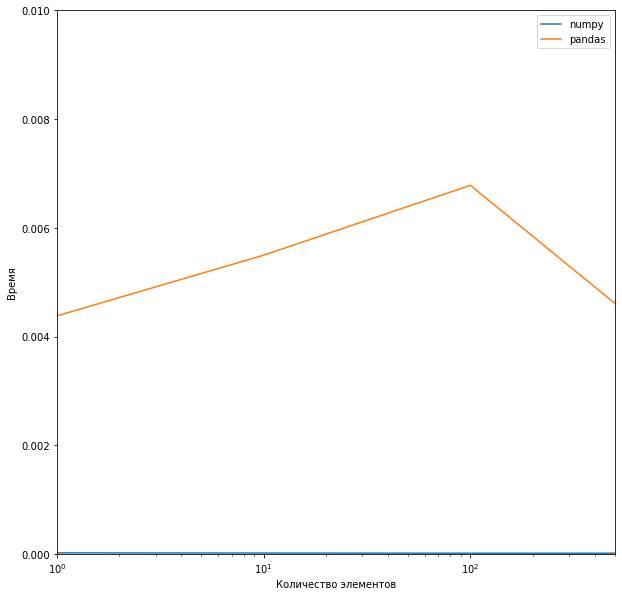

In [93]:
make_plot(500, 0.01)